In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/Covid Data.csv')

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
#shape of dataset
df.shape

(1048575, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
#check the dataset
df.isnull().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [7]:
df["DATE_DIED"].value_counts()

,count
DATE_DIED,
9999-99-99,971633
06/07/2020,1000
07/07/2020,996
13/07/2020,990
16/06/2020,979
...,...
01/01/2021,1
30/12/2020,1
10/01/2021,1


In [8]:
# Assign 0 for patients still alive (DATE_DIED is "9999-99-99"), 1 for patients who died
df["DEATH"] = [0 if date == "9999-99-99" else 1 for date in df["DATE_DIED"]]

In [9]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1


Assign 0=Alive and 1=Death

In [10]:
df['DEATH'].value_counts()

,count
DEATH,
0,971633
1,76942


In [11]:
#copy the dataset avoid any data loss
df2=df.copy()

In [12]:
#check column USMER
df['USMER'].value_counts()

,count
USMER,
2,662903
1,385672


In [13]:
#check columns
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DEATH'],
      dtype='object')

#cleaning dataset

In [14]:
# Drop columns identified as unnecessary
columns_to_drop = ['USMER', 'MEDICAL_UNIT', 'DATE_DIED','CLASIFFICATION_FINAL']
df = df.drop(columns=columns_to_drop)

In [15]:
#columns
df.columns

Index(['SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT',
       'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'ICU', 'DEATH'],
      dtype='object')

#Data Visualization

<Axes: title={'center': 'Age Distribution'}, xlabel='AGE', ylabel='Count'>

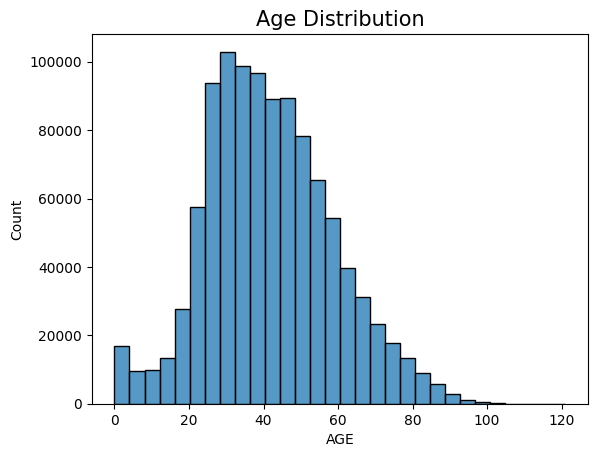

In [16]:
plt.title('Age Distribution', fontsize=15)
sns.histplot(data=df, x=df['AGE'],bins=30)

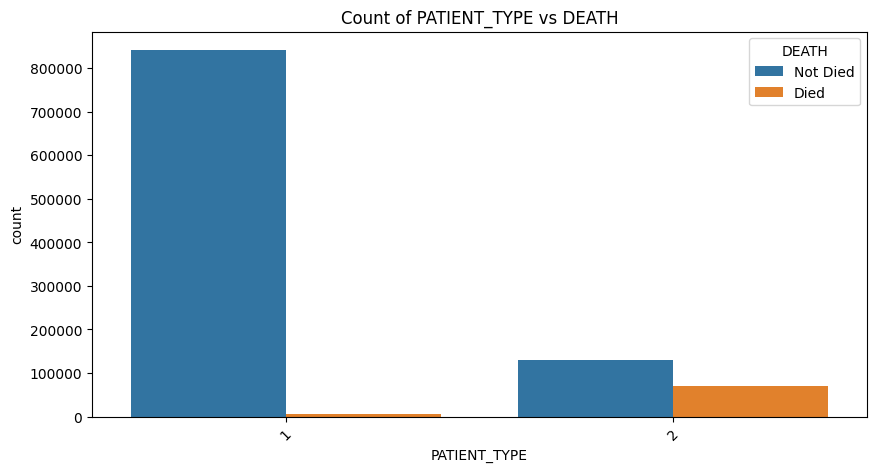

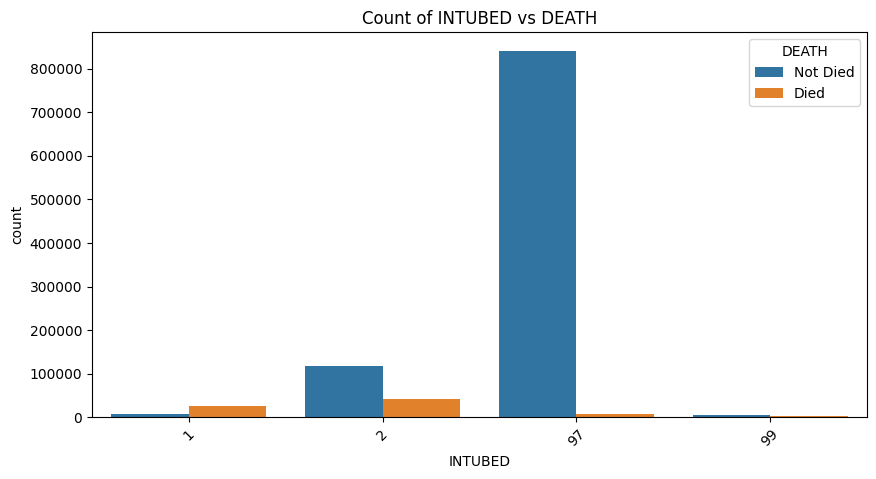

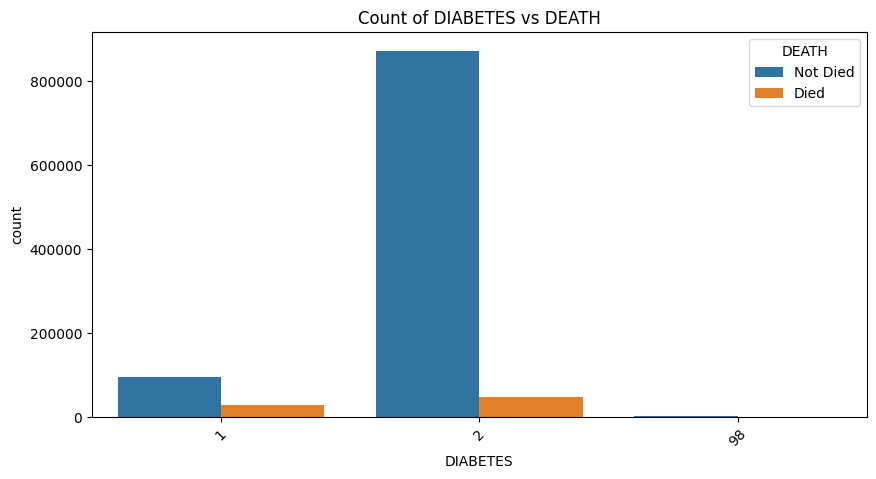

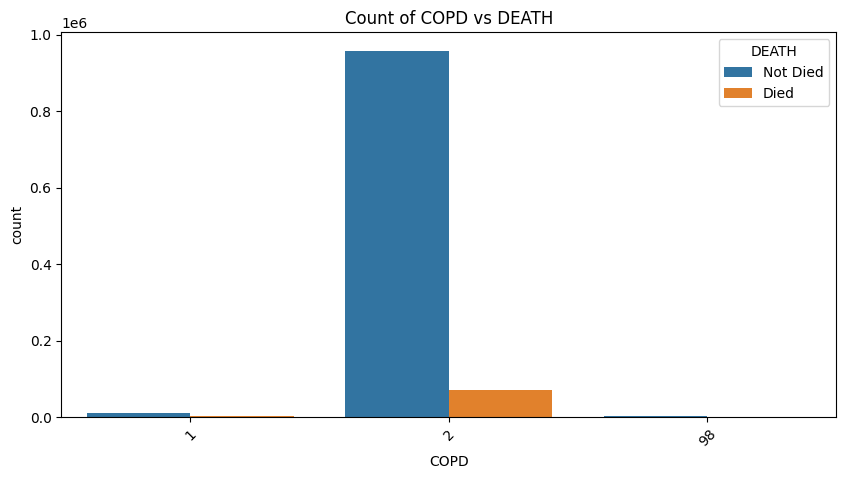

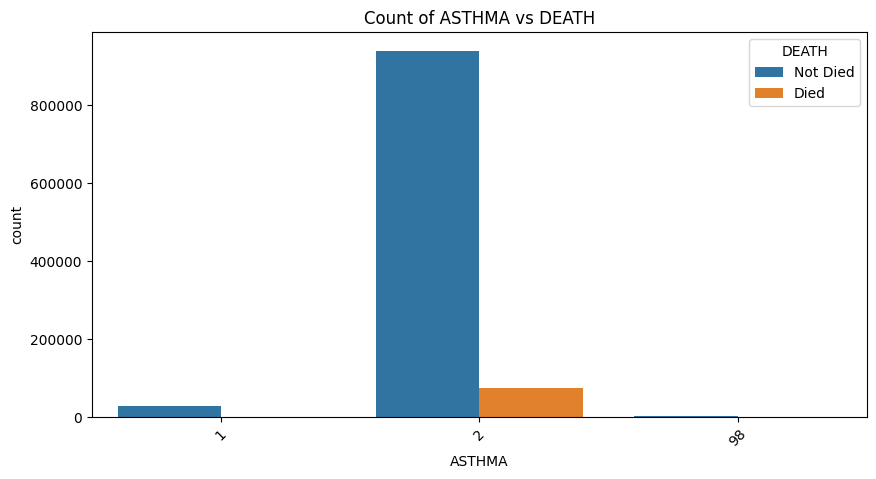

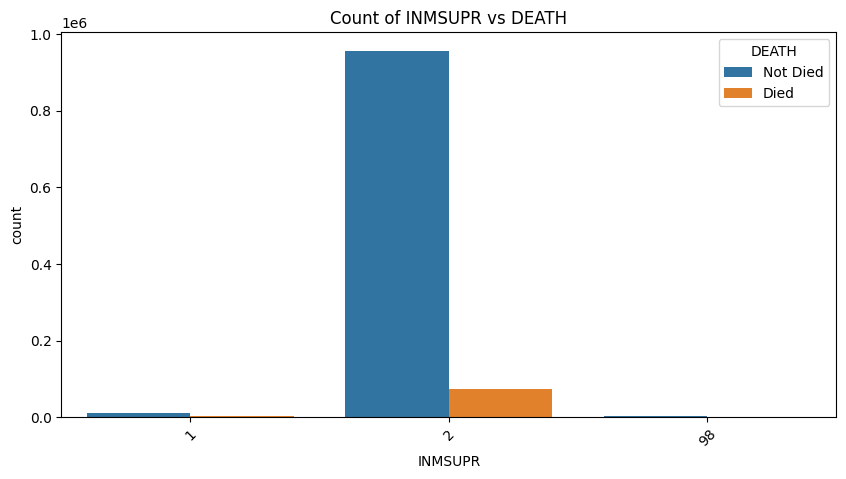

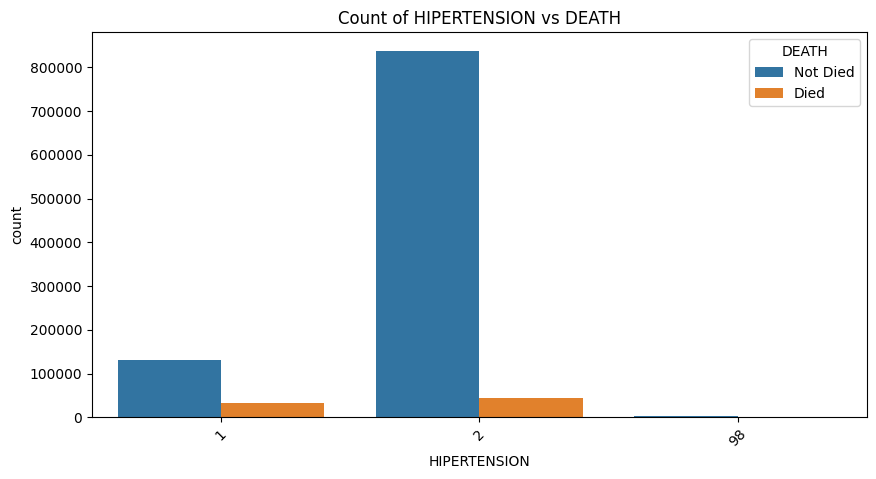

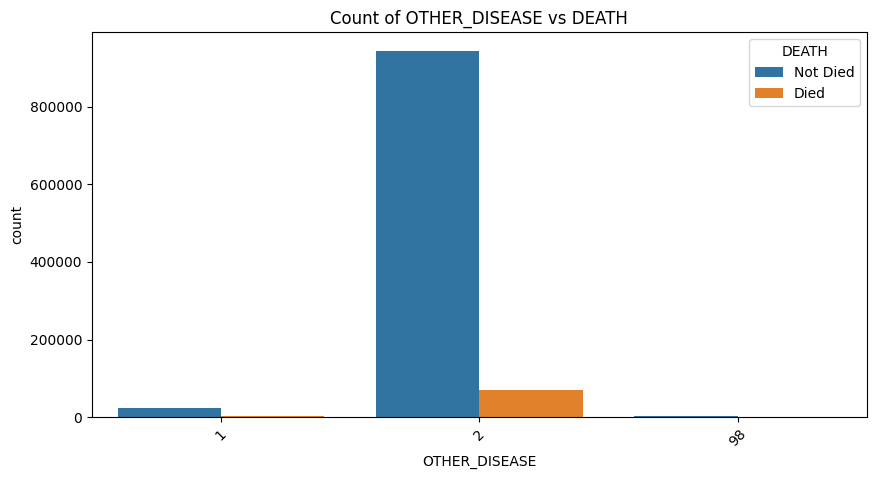

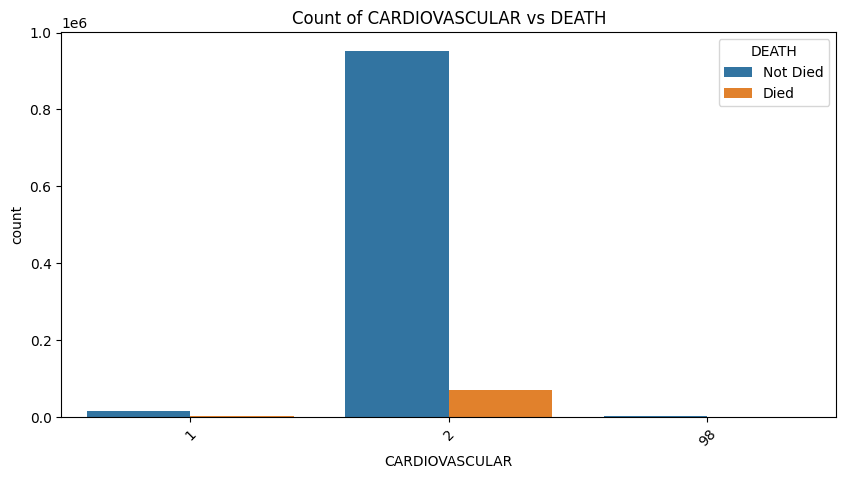

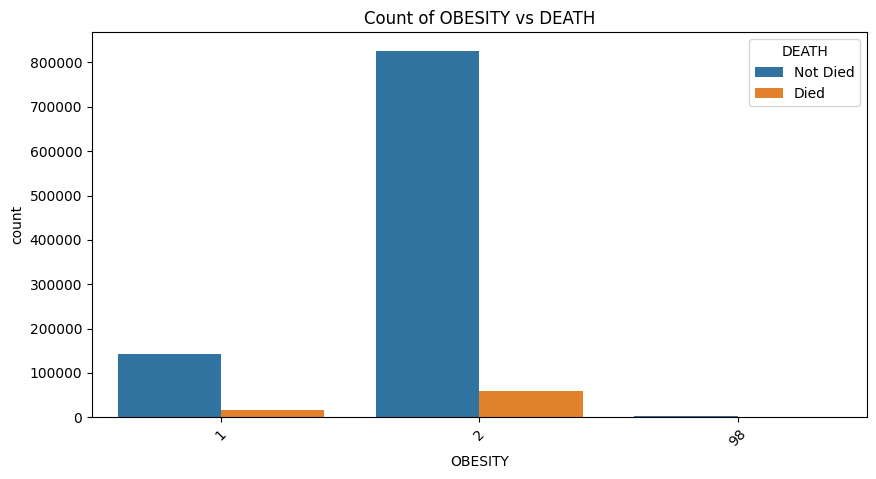

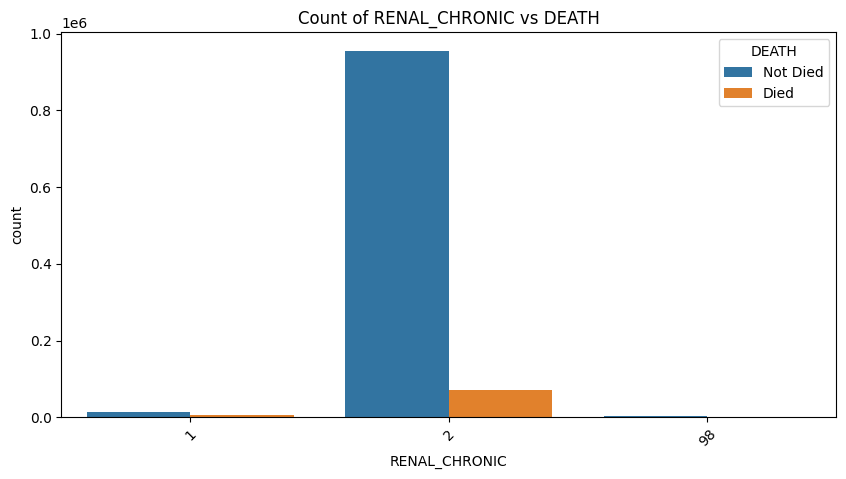

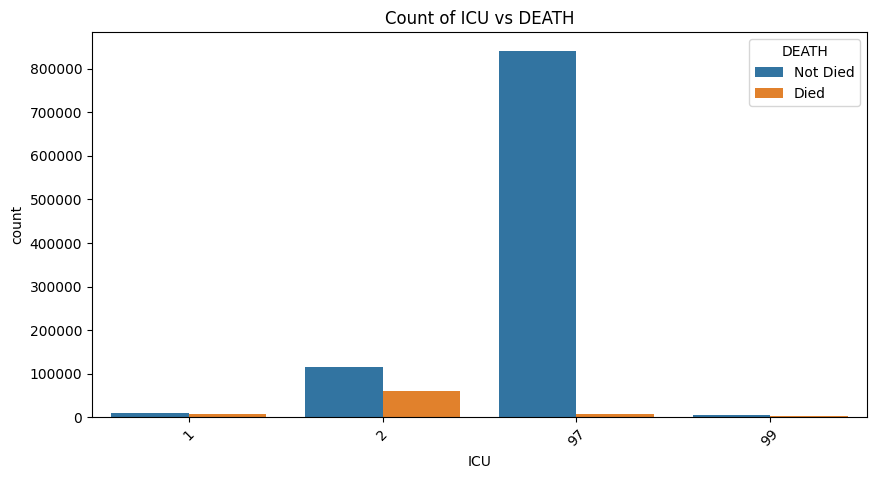

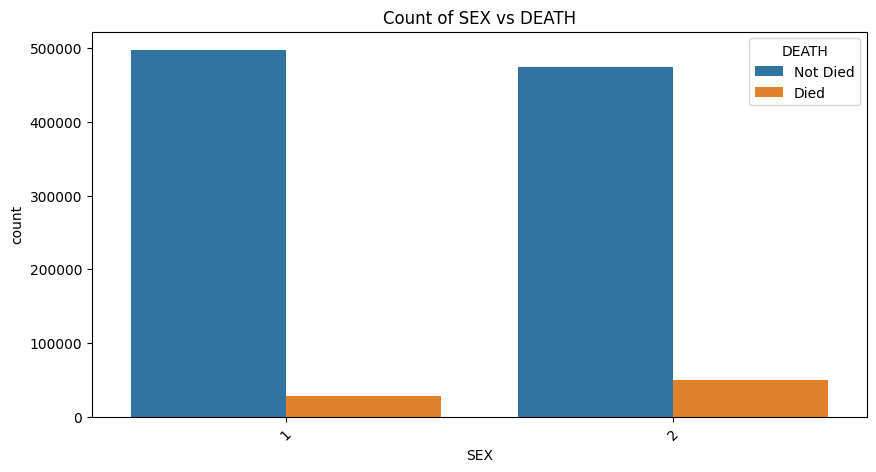

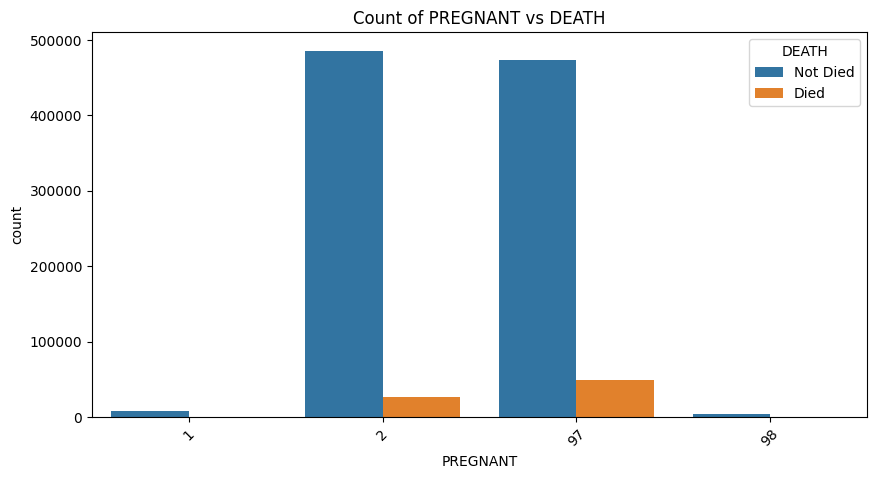

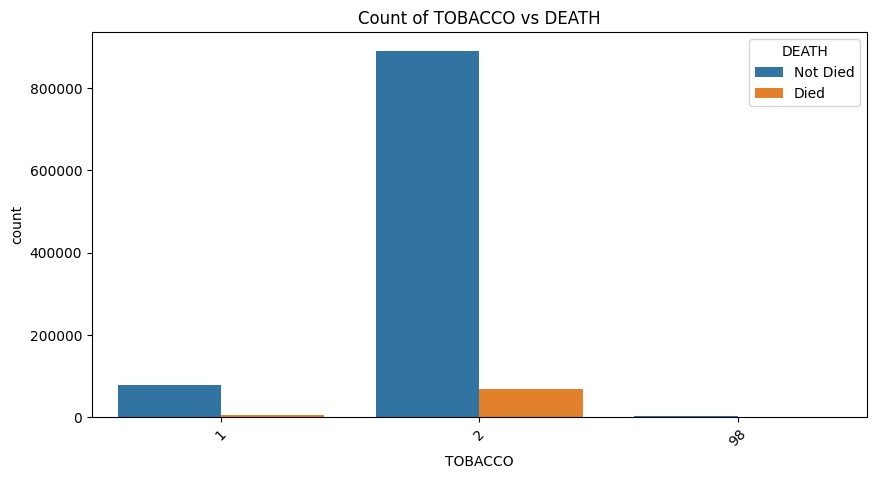

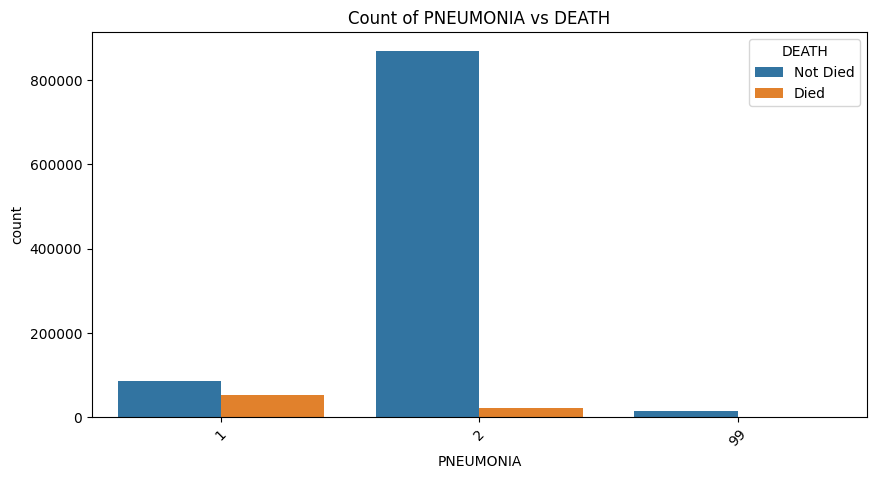

In [17]:
# List of categorical columns
categorical_cols = [
    'PATIENT_TYPE', 'INTUBED', 'DIABETES', 'COPD', 'ASTHMA',
    'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
    'OBESITY', 'RENAL_CHRONIC', 'ICU','SEX', 'PREGNANT','TOBACCO','PNEUMONIA'
]

# Function to plot count plots
def plot_count_with_death(col):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='DEATH')
    plt.title(f'Count of {col} vs DEATH')
    plt.legend(title='DEATH', loc='upper right', labels=['Not Died', 'Died'])
    plt.xticks(rotation=45)
    plt.show()

# Create count plots for each categorical column
for col in categorical_cols:
    plot_count_with_death(col)

<Figure size 800x800 with 0 Axes>

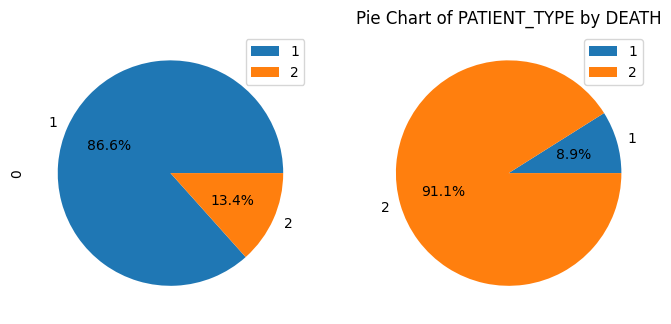

<Figure size 800x800 with 0 Axes>

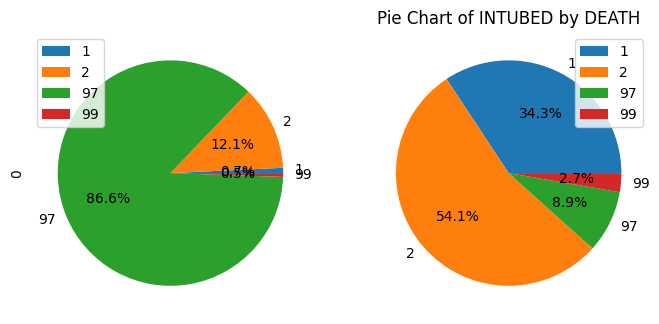

<Figure size 800x800 with 0 Axes>

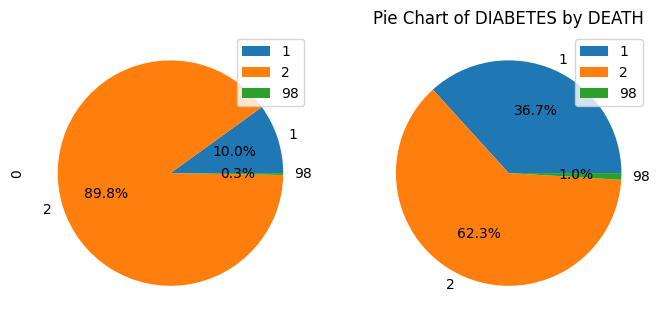

<Figure size 800x800 with 0 Axes>

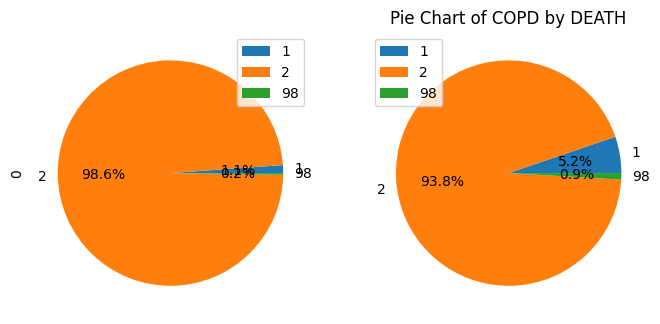

<Figure size 800x800 with 0 Axes>

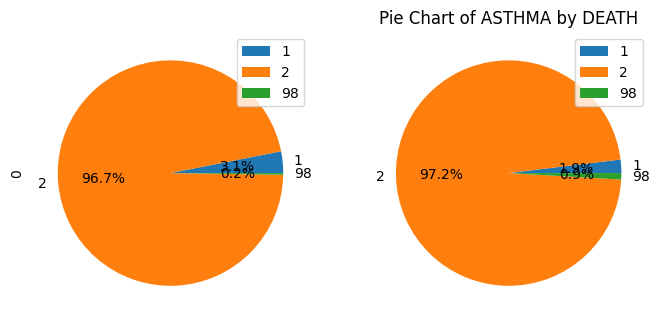

<Figure size 800x800 with 0 Axes>

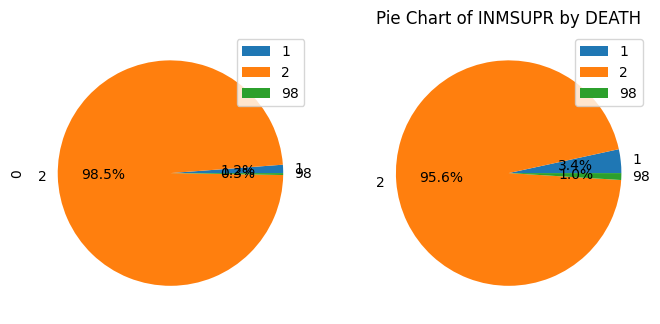

<Figure size 800x800 with 0 Axes>

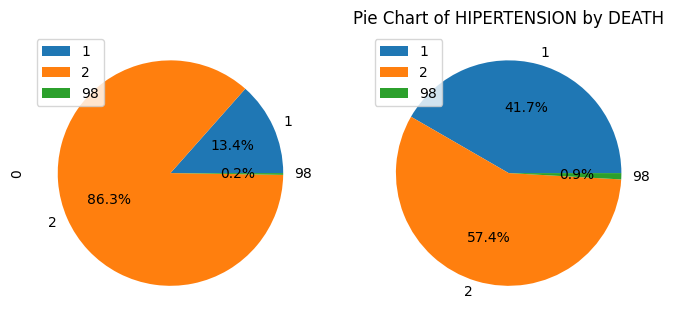

<Figure size 800x800 with 0 Axes>

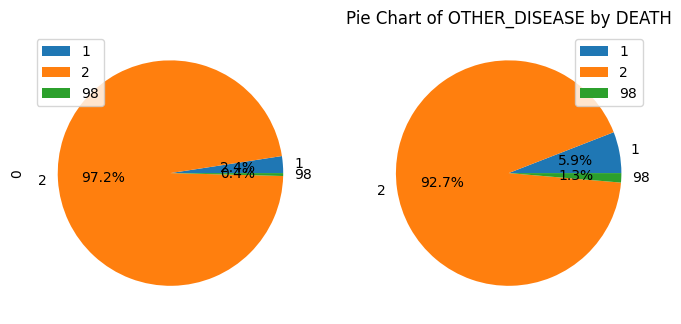

<Figure size 800x800 with 0 Axes>

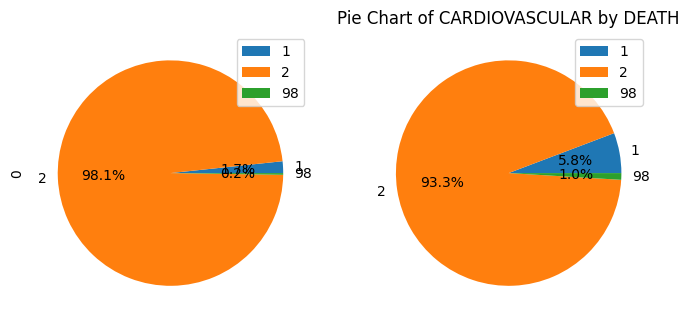

<Figure size 800x800 with 0 Axes>

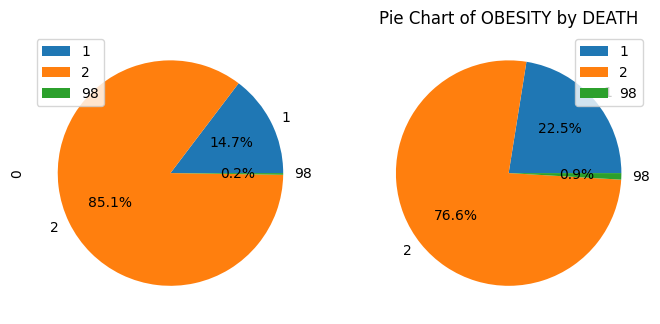

<Figure size 800x800 with 0 Axes>

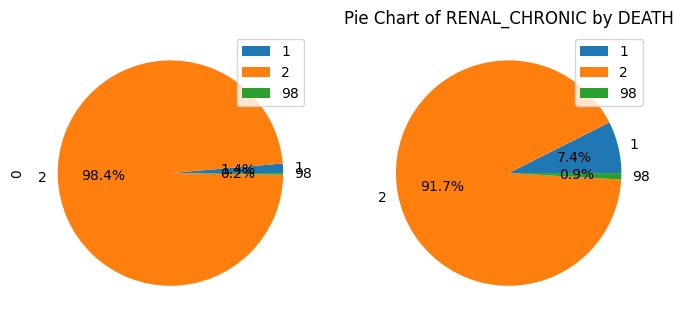

<Figure size 800x800 with 0 Axes>

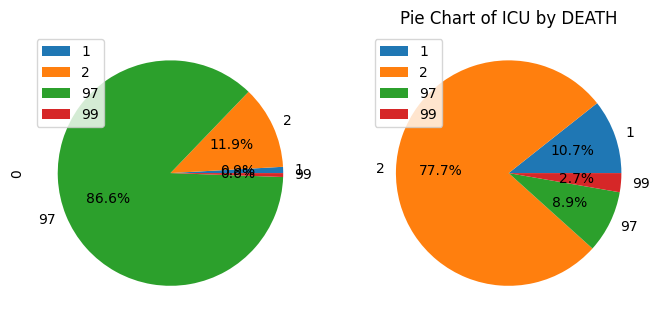

<Figure size 800x800 with 0 Axes>

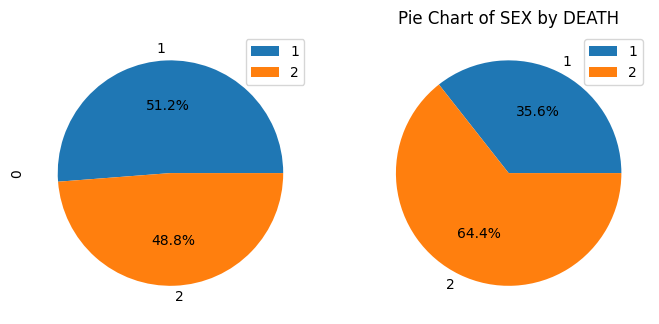

<Figure size 800x800 with 0 Axes>

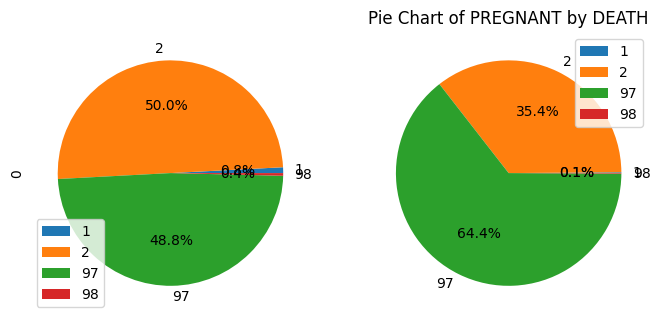

<Figure size 800x800 with 0 Axes>

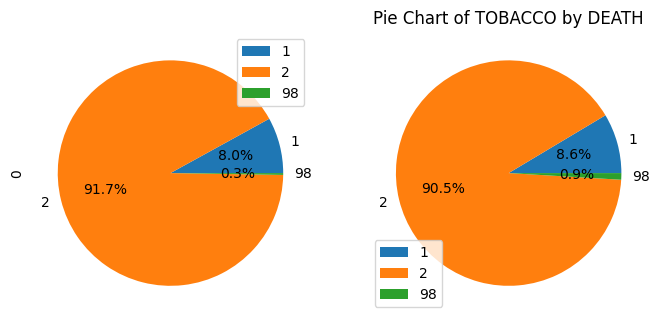

<Figure size 800x800 with 0 Axes>

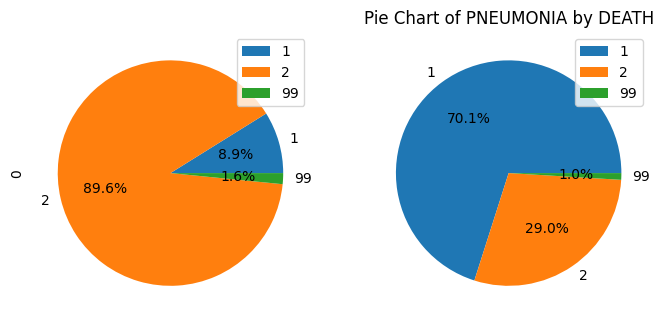

In [18]:
def plot_pie_with_death(col):
    plt.figure(figsize=(8, 8))
    death_counts = df.groupby([col, 'DEATH']).size().unstack(fill_value=0)
    death_counts.plot.pie(autopct='%1.1f%%', subplots=True, figsize=(8, 8))
    plt.title(f'Pie Chart of {col} by DEATH')
    plt.ylabel('')
    plt.show()

# Create pie charts for each categorical column
for col in categorical_cols:
    plot_pie_with_death(col)


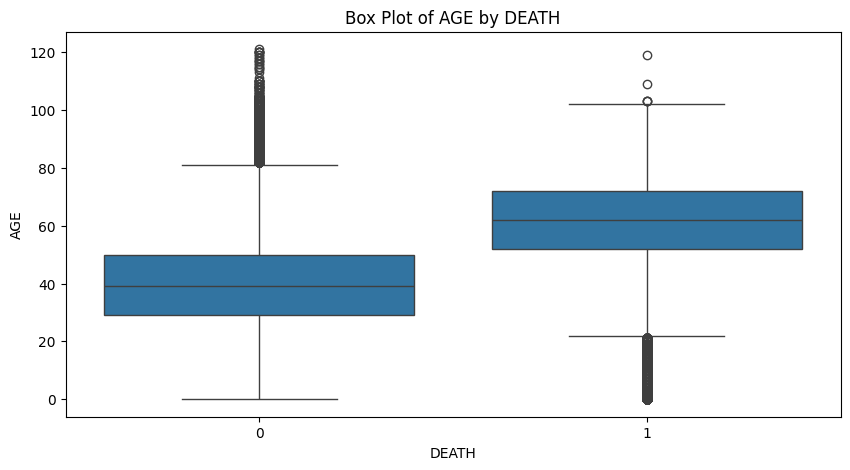

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='DEATH', y='AGE')
plt.title('Box Plot of AGE by DEATH')
plt.show()


<Figure size 1000x500 with 0 Axes>

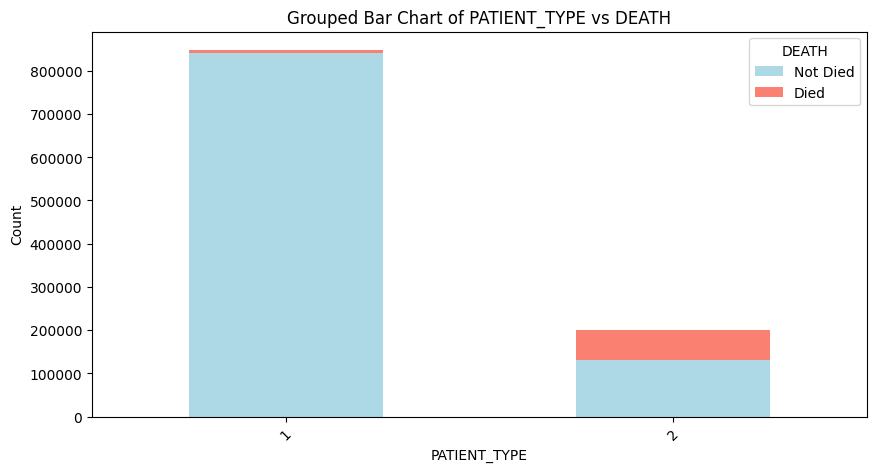

<Figure size 1000x500 with 0 Axes>

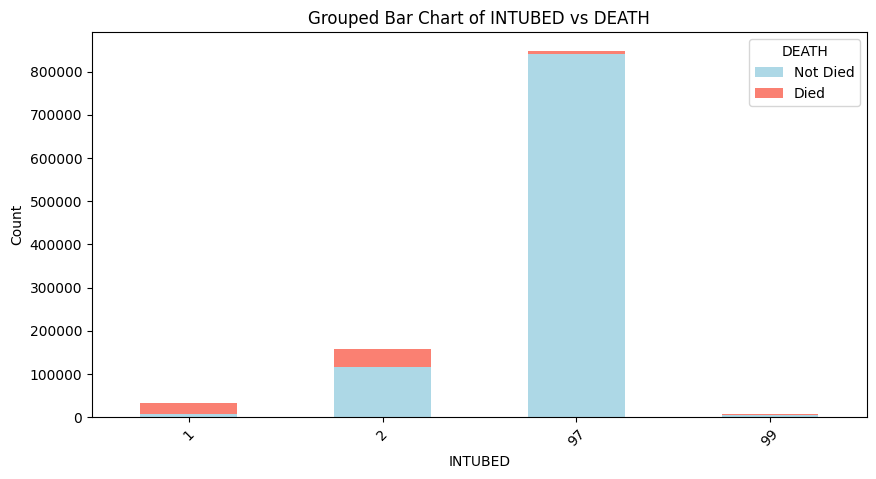

<Figure size 1000x500 with 0 Axes>

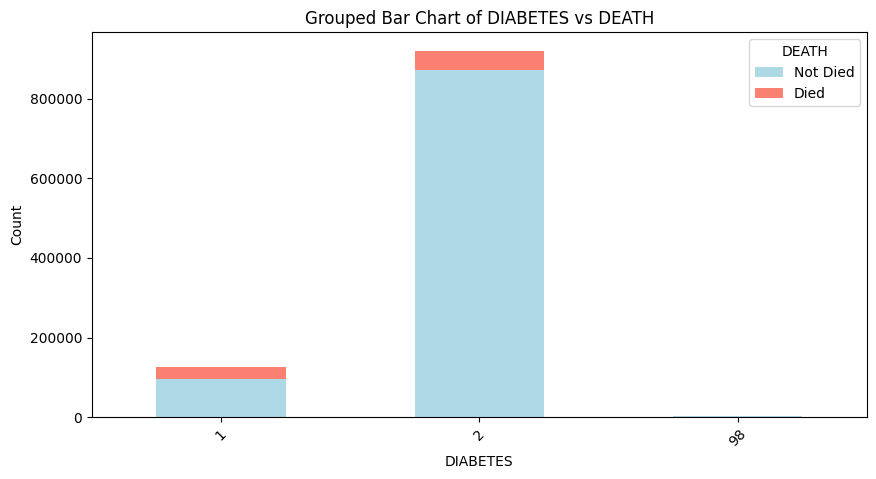

<Figure size 1000x500 with 0 Axes>

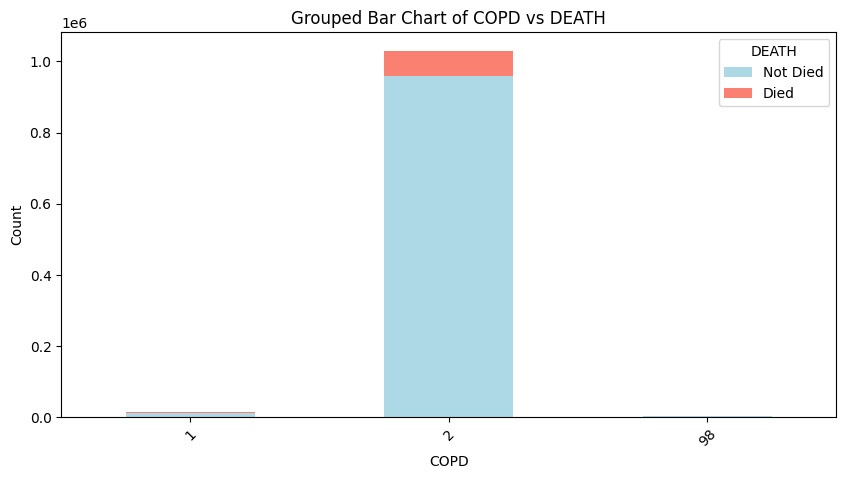

<Figure size 1000x500 with 0 Axes>

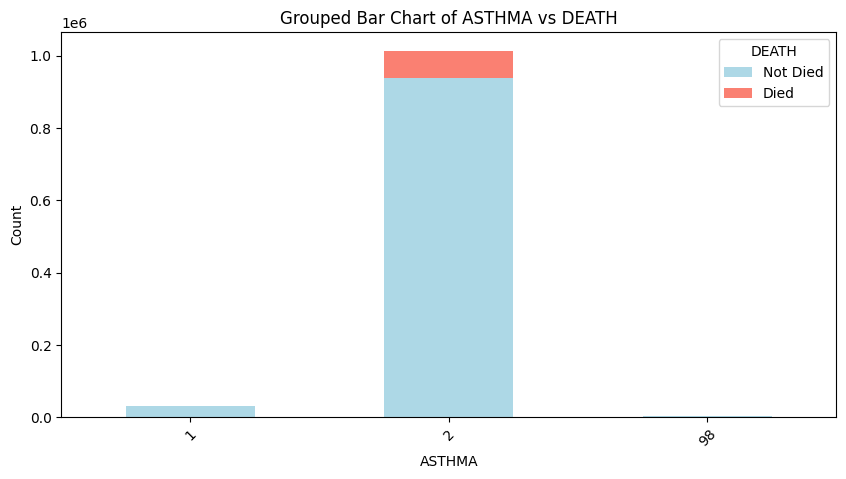

<Figure size 1000x500 with 0 Axes>

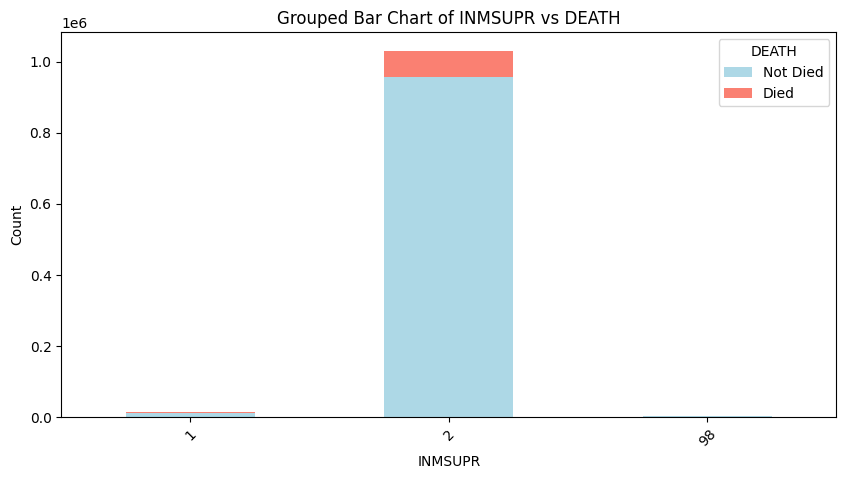

<Figure size 1000x500 with 0 Axes>

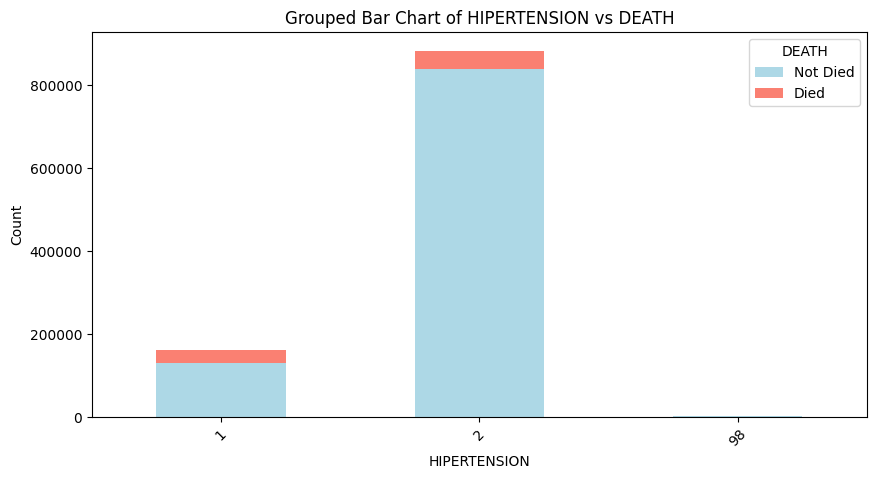

<Figure size 1000x500 with 0 Axes>

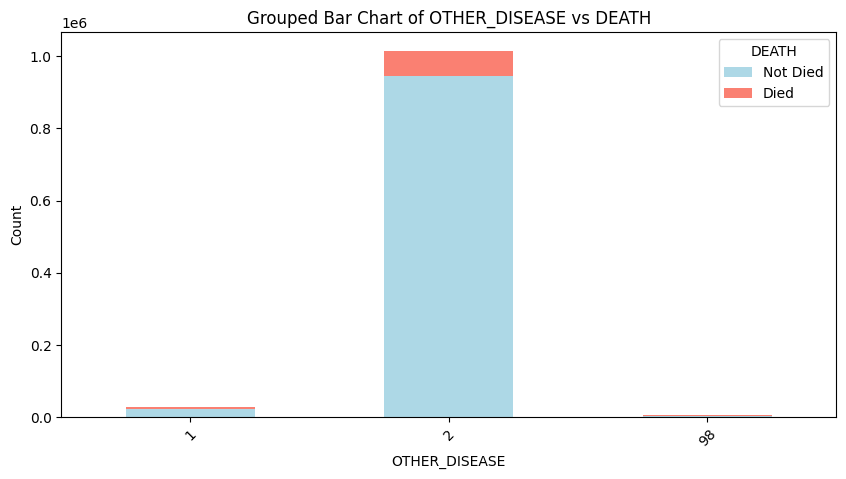

<Figure size 1000x500 with 0 Axes>

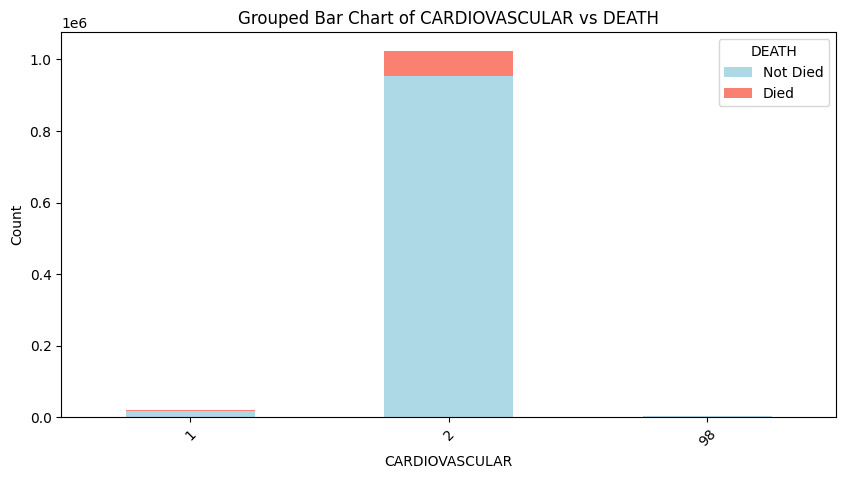

<Figure size 1000x500 with 0 Axes>

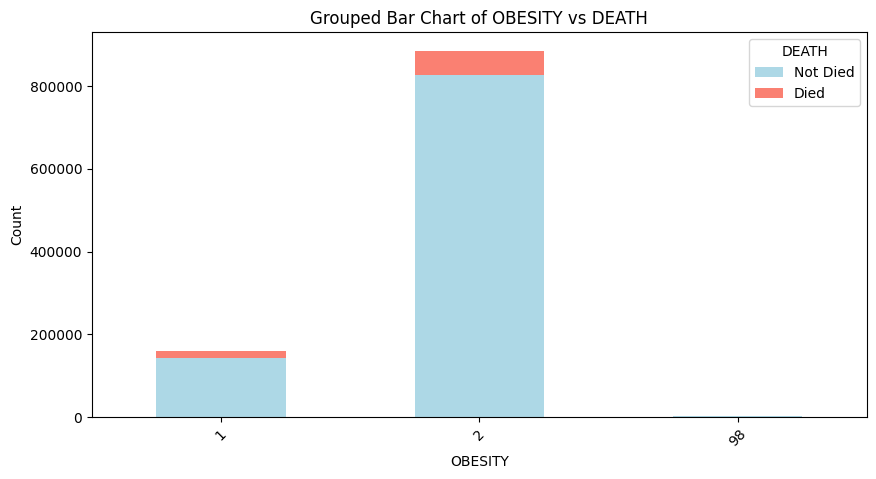

<Figure size 1000x500 with 0 Axes>

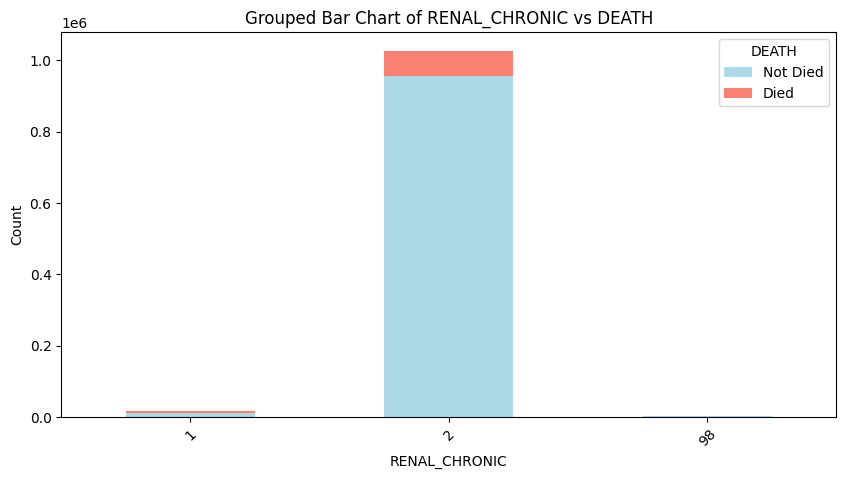

<Figure size 1000x500 with 0 Axes>

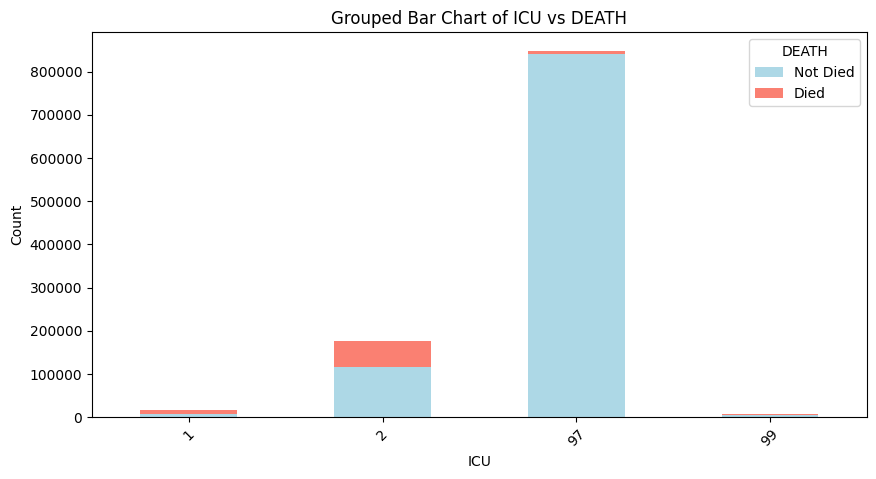

<Figure size 1000x500 with 0 Axes>

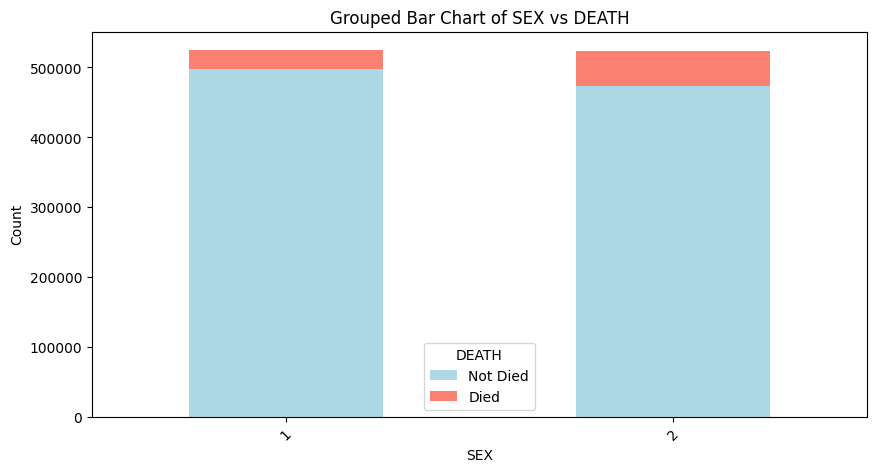

<Figure size 1000x500 with 0 Axes>

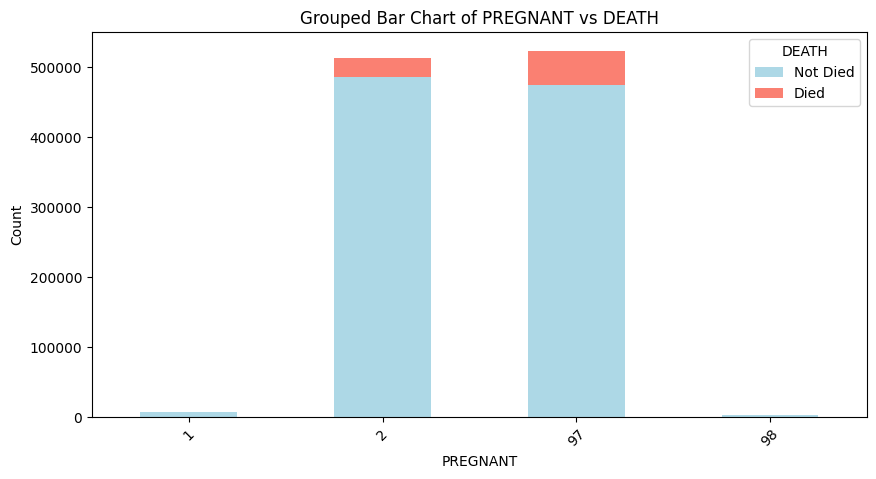

<Figure size 1000x500 with 0 Axes>

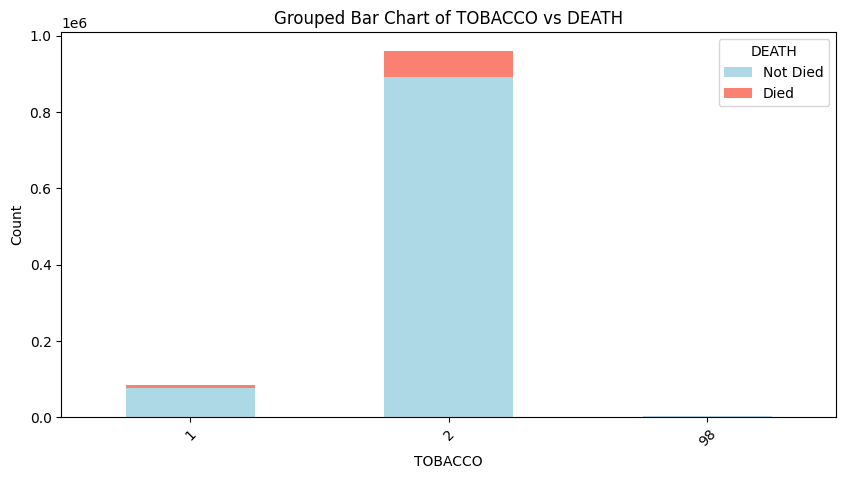

<Figure size 1000x500 with 0 Axes>

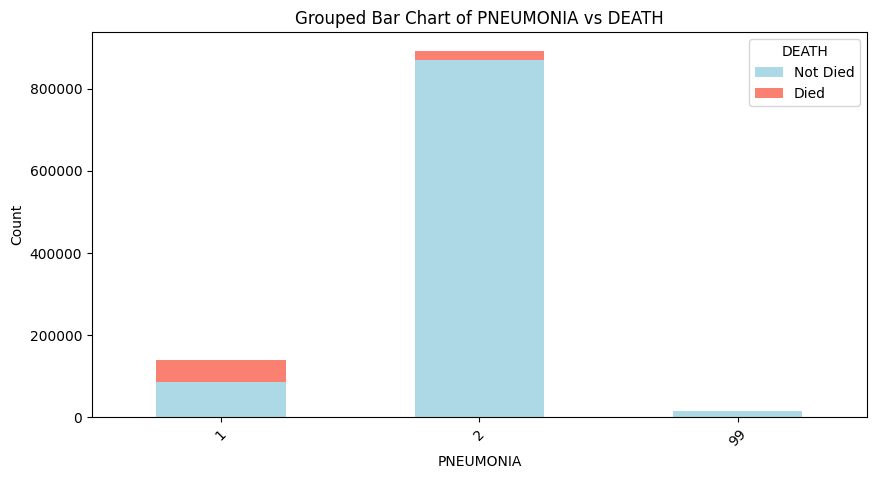

In [20]:
def plot_grouped_bar(col):
    plt.figure(figsize=(10, 5))
    death_counts = df.groupby(col)['DEATH'].value_counts().unstack()
    death_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(10, 5))
    plt.title(f'Grouped Bar Chart of {col} vs DEATH')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='DEATH', labels=['Not Died', 'Died'])
    plt.show()

# Create grouped bar charts for each categorical column
for col in categorical_cols:
    plot_grouped_bar(col)


In [21]:
df.corr()

,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DEATH
SEX,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.089844,0.081383
PATIENT_TYPE,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.975810,0.515582
INTUBED,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.999434,-0.509464
PNEUMONIA,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.079691,-0.026511
AGE,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.317813,0.320801
PREGNANT,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.087991,0.079864
DIABETES,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.009223,0.018588
COPD,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.020146,0.031488
ASTHMA,0.010415,0.023042,-0.023446,-0.005392,0.022715,0.016765,0.829349,0.908929,1.000000,0.868917,0.864264,0.696709,0.891026,0.824631,0.895050,0.845067,-0.023415,0.033924
INMSUPR,0.007999,0.024924,-0.024140,-0.000802,0.022820,0.014265,0.781108,0.852273,0.868917,1.000000,0.825158,0.734826,0.853365,0.783953,0.852755,0.806749,-0.024077,0.031415


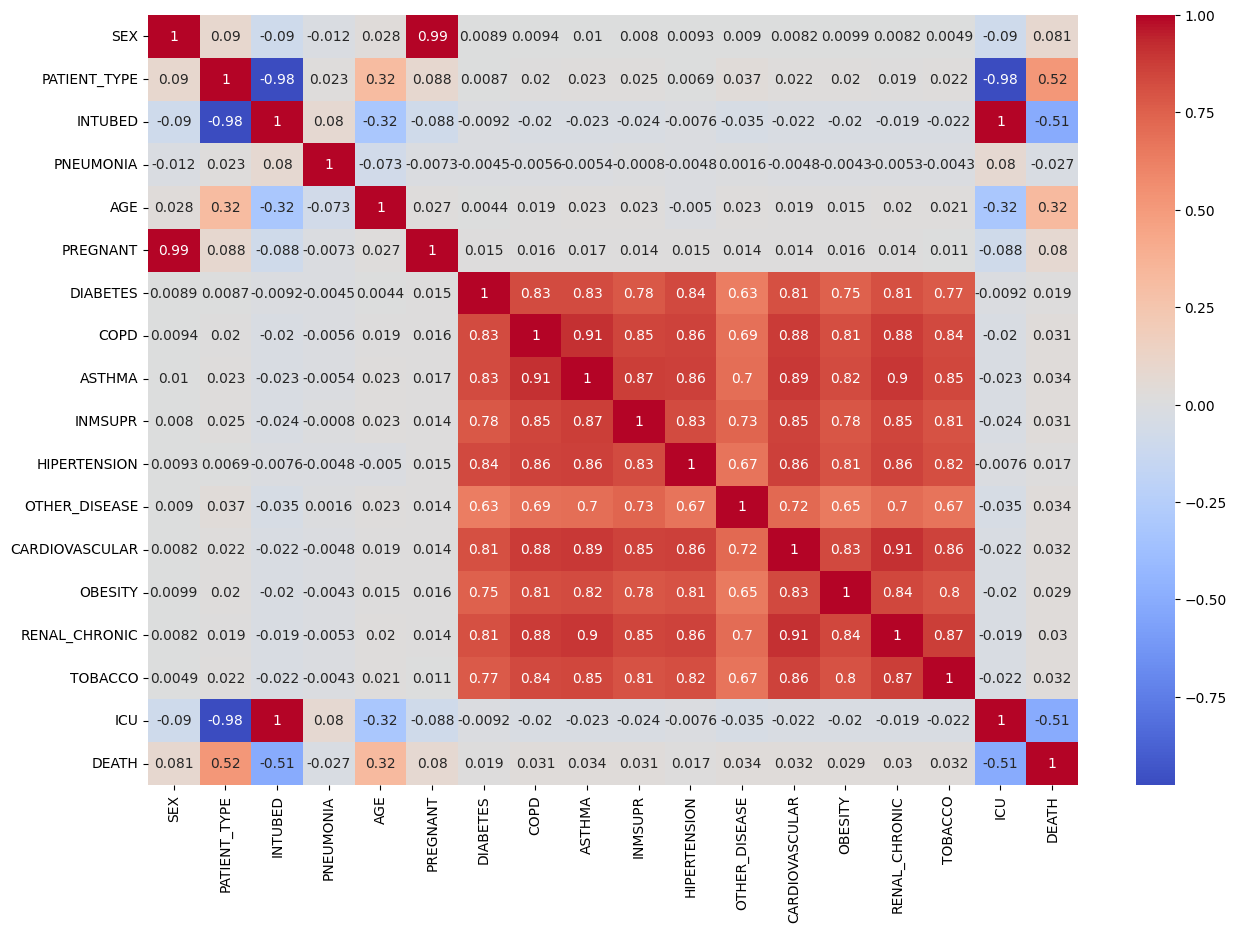

In [22]:
#data feature correlation
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

#Drop Columns with Low Correlation to DEATH
SEX: Correlation of 0.081383, which is relatively low.\
PREGNANT: Correlation of 0.079864, also low.\
PNEUMONIA: Correlation of -0.026511, indicating almost no relationship.\
TOBACCO: Correlation of 0.031958, very weak.

In [23]:
#drop the unnessary column
df=df.drop(['SEX','PREGNANT','PNEUMONIA','TOBACCO'],axis=1)

In [35]:
df.columns

Index(['PATIENT_TYPE', 'INTUBED', 'AGE', 'DIABETES', 'COPD', 'ASTHMA',
       'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'ICU', 'DEATH'],
      dtype='object')

#spliting the dataset

In [24]:
X=df.drop('DEATH',axis=1)
y=df['DEATH']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#build the model on classsification model

In [31]:
# Define models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [32]:
best_model = None
best_accuracy = 0
best_model_name = ""
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

        # Check if this model is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = model_name

print(f"The best model is {best_model_name} with an accuracy of {best_accuracy:.4f}")

Training Logistic Regression...
Logistic Regression Accuracy: 0.9295
Training Decision Tree...
Decision Tree Accuracy: 0.9427
Training Random Forest...
Random Forest Accuracy: 0.9431
The best model is Random Forest with an accuracy of 0.9431


#Save the model

In [34]:
# Save the best model to disk
joblib.dump(best_model, 'best_classification_model.joblib')
print(f"Best model saved as 'best_classification_model.joblib'")

Best model saved as 'best_classification_model.joblib'


In [36]:
#load model
# Load the best model
best_model = joblib.load('best_classification_model.joblib')

In [37]:
# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.4f}")


Model Accuracy on Test Set: 0.9431


In [38]:
# Example Prediction
# Create a sample input (make sure to adjust the values as per your data distribution)
sample_input = np.array([[1, 1, 45, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1]])  # Modify these values accordingly

# Scale the sample input
sample_input_scaled = scaler.transform(sample_input)

# Make a prediction
sample_prediction = best_model.predict(sample_input_scaled)
sample_prediction_proba = best_model.predict_proba(sample_input_scaled) if hasattr(best_model, "predict_proba") else None


In [39]:
print(f"Sample Input Prediction: {sample_prediction[0]}")
if sample_prediction_proba is not None:
    print(f"Prediction Probability: {sample_prediction_proba[0]}")

Sample Input Prediction: 0
Prediction Probability: [0.58 0.42]
